In [1]:
import pandas as pd

# Load cleaned dataset from Day 3
df = pd.read_csv('../data/cleaned_flood_data.csv')

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()


,timestamp,temp,humidity,pressure,wind_speed,rain_1h
0,2025-10-07 23:43:45.656266,22.84,88,1013,1.87,0
1,2025-10-08 15:04:20.942533,28.51,62,1009,2.00,0


In [2]:
# Sort by timestamp
df = df.sort_values('timestamp')

# Cumulative rainfall over past 3h, 6h, 24h
df['rain_3h'] = df['rain_1h'].rolling(window=3, min_periods=1).sum()
df['rain_6h'] = df['rain_1h'].rolling(window=6, min_periods=1).sum()
df['rain_24h'] = df['rain_1h'].rolling(window=24, min_periods=1).sum()

# Rain intensity (difference between current and previous hour)
df['rain_intensity'] = df['rain_1h'].diff().fillna(0)

# Temperature and humidity changes (delta)
df['temp_delta'] = df['temp'].diff().fillna(0)
df['humidity_delta'] = df['humidity'].diff().fillna(0)


In [3]:
# Binary flood risk (1 = flood, 0 = safe)
# Example: if last 6h rainfall > 30mm → flood risk
df['flood_risk'] = df['rain_6h'].apply(lambda x: 1 if x >= 30 else 0)

# Check distribution
print(df['flood_risk'].value_counts())


flood_risk
0    2
Name: count, dtype: int64


In [4]:
df.to_csv('../data/final_flood_dataset.csv', index=False)
print("✅ Final training dataset saved!")


✅ Final training dataset saved!


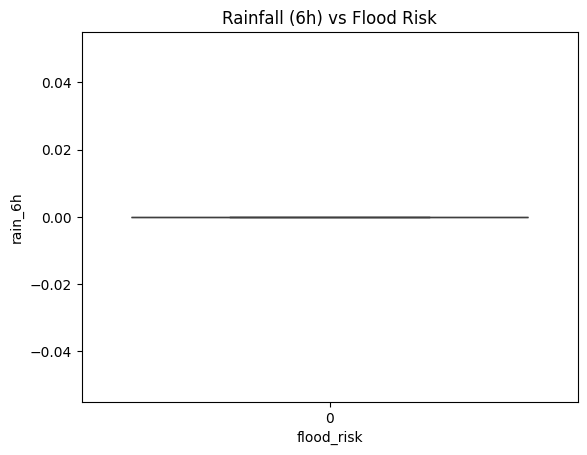

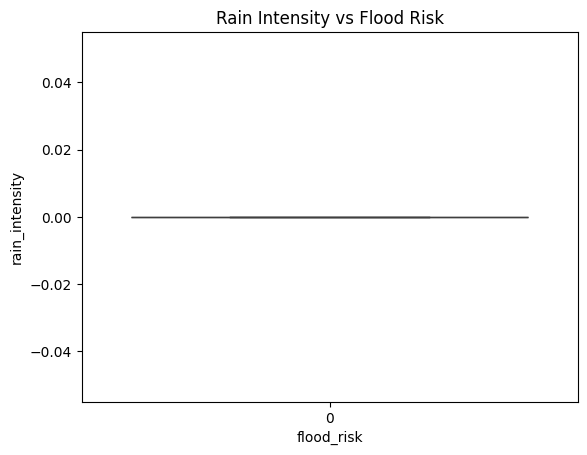

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rainfall vs Flood Risk
sns.boxplot(x='flood_risk', y='rain_6h', data=df)
plt.title('Rainfall (6h) vs Flood Risk')
plt.show()

# Rain intensity vs Flood Risk
sns.boxplot(x='flood_risk', y='rain_intensity', data=df)
plt.title('Rain Intensity vs Flood Risk')
plt.show()
